## 데이터 불러오기

In [293]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
from IPython.core.display import display, HTML

display(HTML("<style>, container{width:90% !important;}</style>"))

In [294]:
input_file = r"/content/coin_project" # csv 파일들이 있는 위치
output_file = r"/content/coin_project/what.csv" # 병합하고 저장하려는 파일명
allFile_list = glob.glob(os.path.join(input_file, 'coin_*')) # glob함수로 coin_으로 시작하는 파일들을 모은다. 
print(allFile_list)

['/content/coin_project/coin_Polkadot.csv', '/content/coin_project/coin_Tron.csv', '/content/coin_project/coin_USDCoin.csv', '/content/coin_project/coin_XRP.csv', '/content/coin_project/coin_Monero.csv', '/content/coin_project/coin_EOS.csv', '/content/coin_project/coin_ChainLink.csv', '/content/coin_project/coin_Stellar.csv', '/content/coin_project/coin_Tether.csv', '/content/coin_project/coin_BinanceCoin.csv', '/content/coin_project/coin_NEM.csv', '/content/coin_project/coin_Dogecoin.csv', '/content/coin_project/coin_Ethereum.csv', '/content/coin_project/coin_Cardano.csv', '/content/coin_project/coin_WrappedBitcoin.csv', '/content/coin_project/coin_Aave.csv', '/content/coin_project/coin_Bitcoin.csv']


In [295]:
allData = [] # 읽어 들인 csv 파일 내용을 저장할 빈 리스트를 하나 만든다. 
for file in allFile_list:
    df = pd.read_csv(file, engine='python') # for 구문으로 csv파일들을 읽어 들인다. 
    allData.append(df)

In [296]:
allData[15] #0~15까지 있음. 

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...,...,...
270,271,Aave,AAVE,2021-07-02 23:59:59,234.483957,215.951539,230.814119,233.948437,2.566395e+08,3.001542e+09
271,272,Aave,AAVE,2021-07-03 23:59:59,265.107342,228.485206,234.208478,259.655225,3.853778e+08,3.331546e+09
272,273,Aave,AAVE,2021-07-04 23:59:59,289.001124,248.285491,259.399426,277.038792,4.275719e+08,3.555054e+09
273,274,Aave,AAVE,2021-07-05 23:59:59,317.387234,263.433881,277.110533,307.829079,7.931409e+08,3.950269e+09


## 데이터 prophet

In [297]:
allData[0].columns

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')

In [298]:
coin_list = []

for i in range(17):
  x = allData[i]['Name'][1]
  coin_list.append(x)
coin_list

['Polkadot',
 'TRON',
 'USD Coin',
 'XRP',
 'Monero',
 'EOS',
 'Chainlink',
 'Stellar',
 'Tether',
 'Binance Coin',
 'NEM',
 'Dogecoin',
 'Ethereum',
 'Cardano',
 'Wrapped Bitcoin',
 'Aave',
 'Bitcoin']

In [299]:
for i in range(17) : 
    allData[i]['Date'] = allData[i]['Date'].str.replace('23:59:59', '')
    allData[i]['Date'] = allData[i]['Date'].astype('datetime64[ns]')
    allData[i] = allData[i][['Date', 'Close']]
    allData[i] = allData[i].rename(columns={'Date' : 'ds', 'Close' : 'y'}) 

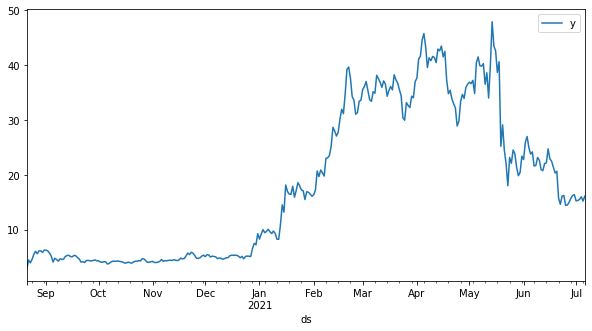

In [300]:
allData[0].plot(x='ds', y='y', figsize=(10,5))
plt.show()

## fit

In [390]:
# pip install fbprophet
from fbprophet import Prophet
coin_Invest_mean_list = []
coin_Invest_lower_list = []
coin_Invest_upper_list = []
coin_Invest_list = []

In [447]:
model = Prophet(seasonality_mode = 'multiplicative',
                yearly_seasonality = True,
                weekly_seasonality = True,
                daily_seasonality = True,
                changepoint_prior_scale=0.5)
model.fit(allData[15])
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

In [448]:
a = (forecast['yhat'].mean() / allData[15]['y'].tail(1))
b = forecast['yhat'].max() / allData[15]['y'].tail(1)
c = forecast['yhat'].min() / allData[15]['y'].tail(1)
d = forecast['yhat'].tail(1)

coin_Invest_mean_list.append(a.values)
coin_Invest_upper_list.append(b.values)
coin_Invest_lower_list.append(c.values)
coin_Invest_list.append(d.values)

In [427]:
coin_Invest_list

[array([59.17479828]),
 array([0.12137877]),
 array([1.01112606]),
 array([0.75995307]),
 array([347.78640269]),
 array([4.91222161]),
 array([41.32883083]),
 array([0.42695007]),
 array([1.00076562]),
 array([731.65863565]),
 array([0.24335161]),
 array([0.39307153]),
 array([3637.62787111]),
 array([2.85839468]),
 array([28205.13191589]),
 array([-2085.87082788]),
 array([48106.31999162])]

In [312]:
print(forecast['yhat'].mean() / allData[16]['y'].tail(1)) # 투자후, 1년동안 평균 상승률
print(forecast['yhat'].max() / allData[16]['y'].tail(1)) # 1년 투자때 최대 수익률
print(forecast['yhat'].min() / allData[16]['y'].tail(1)) # 1년 투자때 최저 수익률 
print(forecast['yhat'].tail(1)) # 정확히 1년 투자시


2990    0.346973
Name: y, dtype: float64
2990    2.949907
Name: y, dtype: float64
2990   -0.025567
Name: y, dtype: float64


### coin_ROI_list

In [463]:
coin_list[12]

'Ethereum'

In [434]:
complete_Invest['Invest_1year'] = pd.DataFrame(coin_Invest_list)
complete_Invest =  complete_Invest.rename(columns={0:'Invest_1year'})
complete_Invest

,Invest_1year,Invest_max,Invest_lower,Invest_mean
0,59.174798,[194.03825784430026],[-0.4303280762961782],[30.839670508340994]
1,0.121379,[5.011172714376997],[-0.00027145067879462447],[0.8551470283983658]
2,1.011126,[1.0228841570001064],[0.9952186683790996],[1.005229325124135]
3,0.759953,[3.5079923673226956],[-0.06603458984256605],[0.43267136771463827]
4,347.786403,[3.1948429158663307],[0.0008395230005588749],[0.48037700497222297]
5,4.912222,[4.242949709130158],[0.10048623583290205],[1.2057658821521882]
6,41.328831,[5.122736468581749],[0.008440381565482201],[0.8885812899092362]
7,0.426950,[4.23021324567599],[-0.03631553183149326],[0.5725630401408993]
8,1.000766,[1.0168112513388572],[0.9681575395406339],[1.0005075066242566]
9,731.658636,[4.9515513366916],[9.127148490309473e-05],[0.49749189584957915]


In [439]:
complete_Invest['Invest_max'] = pd.DataFrame(coin_Invest_upper_list).round(2)
complete_Invest['Invest_lower'] = pd.DataFrame(coin_Invest_lower_list).round(2)
complete_Invest['Invest_mean'] = pd.DataFrame(coin_Invest_mean_list).round(2)

In [446]:
complete_Invest['coin_name'] = coin_list
complete_Invest = complete_Invest.set_index('coin_name')
complete_Invest.head()

,Invest_1year,Invest_max,Invest_lower,Invest_mean
coin_name,,,,
Polkadot,59.174798,194.04,-0.43,30.84
TRON,0.121379,5.01,-0.00,0.86
USD Coin,1.011126,1.02,1.00,1.01
XRP,0.759953,3.51,-0.07,0.43
Monero,347.786403,3.19,0.00,0.48


In [ ]:
complete_Invest.to_csv('complete_Invest.csv')

## Predict

In [315]:
future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)

forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
3351,2022-07-02,16470.508702,17793.125749,79341.795156,6048.684885,25643.778085,2.975356,2.975356,2.975356,2.098114,2.098114,2.098114,0.001610,0.001610,0.001610,-0.878852,-0.878852,-0.878852,0.0,0.0,0.0,51027.516671
3352,2022-07-03,16488.014912,17591.700110,78739.732829,5977.934978,25722.410299,2.975356,2.975356,2.975356,2.042980,2.042980,2.042980,-0.007758,-0.007758,-0.007758,-0.924618,-0.924618,-0.924618,0.0,0.0,0.0,50172.705760
3353,2022-07-04,16505.521121,17367.761002,77641.287044,5901.698204,25778.878302,2.975356,2.975356,2.975356,2.005561,2.005561,2.005561,0.001105,0.001105,0.001105,-0.970899,-0.970899,-0.970899,0.0,0.0,0.0,49608.357608
3354,2022-07-05,16523.027331,17569.524152,76754.963897,5825.461430,25826.000366,2.975356,2.975356,2.975356,1.965671,1.965671,1.965671,0.007829,0.007829,0.007829,-1.017515,-1.017515,-1.017515,0.0,0.0,0.0,49001.863147
3355,2022-07-06,16540.533540,16916.558945,75319.983142,5749.224656,25872.541159,2.975356,2.975356,2.975356,1.908390,1.908390,1.908390,-0.002677,-0.002677,-0.002677,-1.064289,-1.064289,-1.064289,0.0,0.0,0.0,48106.319992


In [471]:
coin_list[0]

'Polkadot'

In [473]:
model = Prophet(seasonality_mode = 'multiplicative',
                yearly_seasonality = True,
                weekly_seasonality = True,
                daily_seasonality = True,
                changepoint_prior_scale=0.5)
model.fit(allData[0])
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

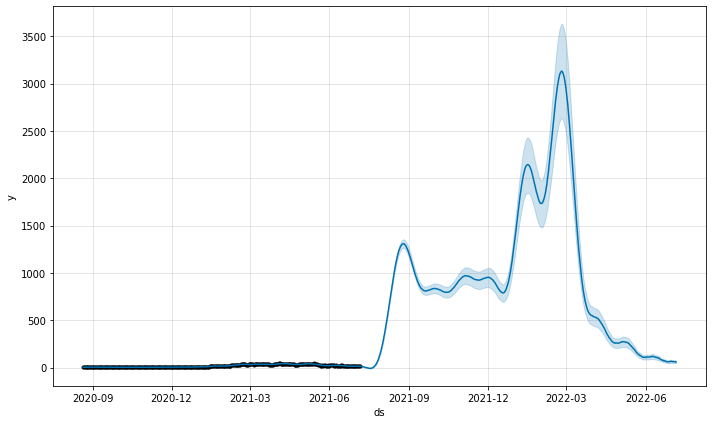

In [474]:
fig1 = model.plot(forecast)